## Q.1) What is multithreading in python? Why is it used? Name the module used to handle threads in python

Multithreading is defined as the ability of a processor to execute multiple threads concurrently. In a simple, single-core CPU, it is achieved using frequent switching between threads. This is termed context switching. In context switching, the state of a thread is saved and the state of another thread is loaded whenever any interrupt (due to I/O or manually set) takes place. Context switching takes place so frequently that all the threads appear to be running parallelly (this is termed multitasking).

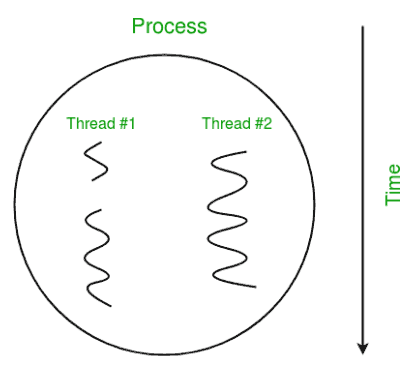

In Python, the threading module provides a very simple and intuitive API for spawning multiple threads in a program.

**Import Module**

First, import the threading module.

`import threading`

## Q2)Why threading module used? Write the use of the following functions:
#### 1. activeCount()
#### 2. currentThread()
##### 3. enumerate()

Python threading allows you to have different parts of your program run concurrently and can simplify your design.  


**>** threading.activeCount() − Returns the number of thread objects that are active.

**>** threading.currentThread() − Returns the number of thread objects in the caller's thread control.

**>** threading.enumerate() − Returns a list of all thread objects that are currently active.

## Q3. Explain the following functions
1. run()
2. start()
3. join()
4. isAlive()

**>** threading.run(): 
Executes any target function belonging to a given thread object that is now active.

**>** threading.start() :
Executes any target function belonging to a given thread object that is now active.

**>** threading.join():
Delays the flow of execution of a program until the target thread is completely read.

**>** threading.isAlive():
Returns True if the thread is still running and False, otherwise.

## Q.4)Write a python program to create two threads. Thread one must print the list of squares and thread two must print the list of cubes

In [16]:
import threading

def print_cube(x):
    print(f"Cube of {x} : {x*x*x}")

def print_sqr(x):
    print(f"Square of {x}: {x*x}")

In [20]:
thread1 = [threading.Thread(target=print_cube,args=(i,)) for i in [2,3,4]]
thread2 = [threading.Thread(target=print_sqr,args=(i,)) for i in [2,3,4]]

In [22]:
for t in thread1:
    t.start()

Cube of 2 : 8
Cube of 3 : 27
Cube of 4 : 64


In [23]:
for t in thread2:
    t.start()

Square of 2: 4
Square of 3: 9
Square of 4: 16


## Q5) State advantages and disadvantages of multithreading

### Advantages of Multithreading 

**1.Improved Performance**: Multithreading improves the performance of applications by running the task simultaneously.

**2.Better Responsiveness**: Multithreading improves the responsiveness of your backend applications by running threads after a task is blocked. It helps in handling multiple user requests in a real-time application.

**3.Scalability** : Multithreading improves the scalability of an application by letting developers add more processors. It is useful when handling a large, growing number of users on a server.

**4.Real-time processing** : Multithreading ensures tasks or requests are executed with little delay and maintains a smooth performance during real-time data processing.

### Disadvantages of Multithreading 

1. As number of threads increase, complexity increases.
2. Synchronization of shared resources (objects, data) is necessary.
3. It is difficult to debug, result is sometimes unpredictable.
4. Potential deadlocks which leads to starvation, i.e. some threads may not be served with a bad design.
5. Constructing and synchronizing threads is CPU/memory intensive.

## Q6) Explain deadlocks and race conditions.

**Deadlocks** :
A deadlock may be described as a concurrency failure mode. It is a situation in a program where one or more threads wait for a condition that never occurs. As a result, the threads are unable to progress and the program is stuck or frozen and must be terminated manually.Deadlock situation may arise in many ways in your concurrent program. Deadlocks are never not developed intentionally, instead, they are in fact a side effect or bug in the code.

**Common causes of thread deadlocks are listed below −**
1. A thread that attempts to acquire the same mutex lock twice.
2. Threads that wait on each other (e.g. A waits on B, B waits on A).
3. When a thread that fails to release a resource such as lock, semaphore, condition, event, etc.
4. Threads that acquire mutex locks in different orders (e.g. fail to perform lock ordering).


**Race conditions** :
A race condition occurs when two or more threads can access shared data and they try to change it at the same time. As a result, the values of variables may be unpredictable and vary depending on the timings of context switches of the processes.A race condition occurs when two or more threads can access shared data and they try to change it at the same time. As a result, the values of variables may be unpredictable and vary depending on the timings of context switches of the processes.

Consider the program below to understand the concept of race condition:

In [1]:
import threading 

# global variable x 
x = 0

def increment(): 
	""" 
	function to increment global variable x 
	"""
	global x 
	x += 1

def thread_task(): 
	""" 
	task for thread 
	calls increment function 100000 times. 
	"""
	for _ in range(100000): 
		increment() 

def main_task(): 
	global x 
	# setting global variable x as 0 
	x = 0

	# creating threads 
	t1 = threading.Thread(target=thread_task) 
	t2 = threading.Thread(target=thread_task) 

	# start threads 
	t1.start() 
	t2.start() 

	# wait until threads finish their job 
	t1.join() 
	t2.join() 

if __name__ == "__main__": 
	for i in range(10): 
		main_task() 
		print("Iteration {0}: x = {1}".format(i,x)) 


Iteration 0: x = 200000
Iteration 1: x = 200000
Iteration 2: x = 200000
Iteration 3: x = 200000
Iteration 4: x = 200000
Iteration 5: x = 200000
Iteration 6: x = 200000
Iteration 7: x = 200000
Iteration 8: x = 200000
Iteration 9: x = 200000


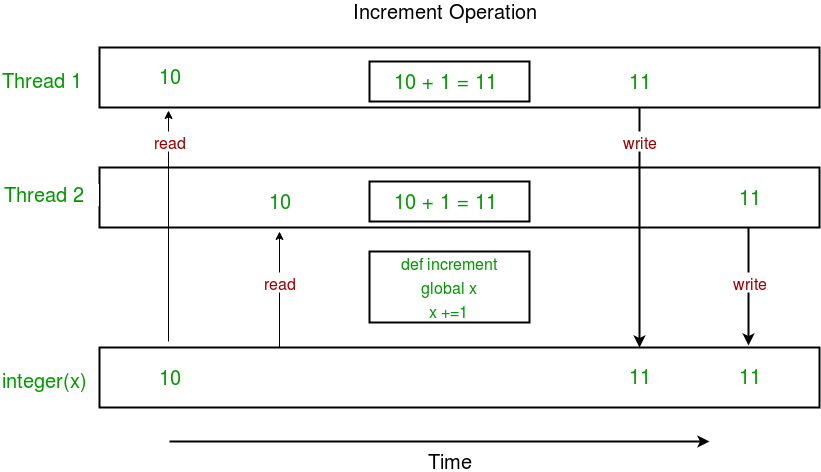